## Value of Energy Cost Saving Program

### Day 4: Pandas

Milestone Action Items<br>

Download the data set about Value of Energy Cost Saving Program for businesses in New York City (under the "Export" option, there is a way to retrieve a CSV file). Answer the following questions.<br>

How many different companies are represented in the data set? <br>
What is the total number of jobs created for businesses in Queens? <br>
How many different unique email domains names are there in the data set? <br>
Considering only NTAs with at least 5 listed businesses, what is the average total savings and the total jobs created for each NTA? <br>
Save your result for the previous question as a CSV file <br>


In [171]:
pwd

'C:\\Users\\jzhou01\\My Files\\Data Science\\The Data Incubator Bootcamp\\12 Day Prerequisites\\Day4'

In [172]:
import pandas as pd

df = pd.read_csv('Value_of_Energy_Cost_Savings_Program_Savings_for_Businesses_-_FY2020.csv')
# df.head(5)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 26 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Company Name                               450 non-null    object 
 1   company contact                            450 non-null    object 
 2   company email                              433 non-null    object 
 3   company phone                              450 non-null    object 
 4   Address                                    450 non-null    object 
 5   City                                       450 non-null    object 
 6   State                                      450 non-null    object 
 7   Postcode                                   450 non-null    int64  
 8   Industry                                   450 non-null    object 
 9   Industry descr                             434 non-null    object 
 10  Company Type              

#### 1. How many different companies are represented in the data set?

In [173]:
df['Company Name'].nunique()

439

#### 2. What is the total number of jobs created for businesses in Queens?

In [174]:
# df['Job created']

df[df['City'] == 'Queens']['Job created'].sum()

90.0

#### 3. How many different unique email domains names are there in the data set?

In [175]:
df_email = df[df['company email'].str.contains("@") == True]  
df_email = df_email['company email'].dropna()

df_email.apply(lambda x: x.split('@')[1]).nunique()

356

In [176]:
# df_email.apply(lambda x: x.split('@')[1]).value_counts()

# def checkemail (x):
#     if '@' in x:
#         return True
#     else:
#         return False
    
# df_email.apply(lambda x: checkemail(x)).value_counts()   

#### 4. Considering only NTAs with at least 5 listed businesses, what is the average total savings and the total jobs created for each NTA?

In [177]:
# df['NTA'].isnull().sum()
# df['NTA'].value_counts(dropna=True)
# df_nta = df.drop_duplicates(['Company Name'], keep='last')

# sum(df_nta['NTA'].value_counts()>=5)
# df['NTA'].value_counts().loc[lambda x:x>=5]

In [178]:
df_nta = df.dropna(subset=['NTA'])
df_nta = df_nta[df_nta.groupby('NTA')['NTA'].transform('count')>=5]

df_nta = df_nta.groupby('NTA').mean()[['Total Savings','Job created']]
df_nta

,Total Savings,Job created
NTA,,
Battery Park City-Lower Manhattan,469890.796667,NaN
Bushwick South,26140.455000,10.000000
Carroll Gardens-Columbia Street-Red Hook,24337.390000,NaN
College Point,17159.372857,2.000000
Crown Heights North,4036.298889,NaN
DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill,59950.340000,NaN
East New York,48433.093333,15.000000
East Williamsburg,13990.626364,NaN
Greenpoint,9753.649286,NaN


#### 5. Save your result for the previous question as a CSV file

In [179]:
df_nta.to_csv('df_nta',sep=',', encoding='utf-8', header='true')

In [180]:
# read csv file into dataframe

dft = pd.read_csv('df_nta')
dft


,NTA,Total Savings,Job created
0,Battery Park City-Lower Manhattan,469890.796667,NaN
1,Bushwick South,26140.455000,10.000000
2,Carroll Gardens-Columbia Street-Red Hook,24337.390000,NaN
3,College Point,17159.372857,2.000000
4,Crown Heights North,4036.298889,NaN
5,DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill,59950.340000,NaN
6,East New York,48433.093333,15.000000
7,East Williamsburg,13990.626364,NaN
8,Greenpoint,9753.649286,NaN
9,Hunters Point-Sunnyside-West Maspeth,23931.398933,NaN



### Day 5: Plotting

Matplotlib is Python's most popular plotting package. 


Milestone Action Items <br>

1. Go through the Introductory Tutorials on Matplotlib.  <br> 
2. Using the same data set and results that you were working with in the pandas action items section (Day 4), create a <br>
&emsp;  1) scatter plot of jobs created versus average savings. Use both a standard and a logarithmic scale for the average savings. <br> 
&emsp;  2) histogram of the log of the average total savings. <br> 
&emsp;  3) line plot of the total jobs created for each month. <br> 
3. If you have time, take a look at this short tutorial on Altair. <br>

In [181]:
import matplotlib.pyplot as plt

In [182]:
%matplotlib inline

<br>
1) scatter plot of jobs created versus average savings. Use both a standard and a logarithmic scale for the average savings.

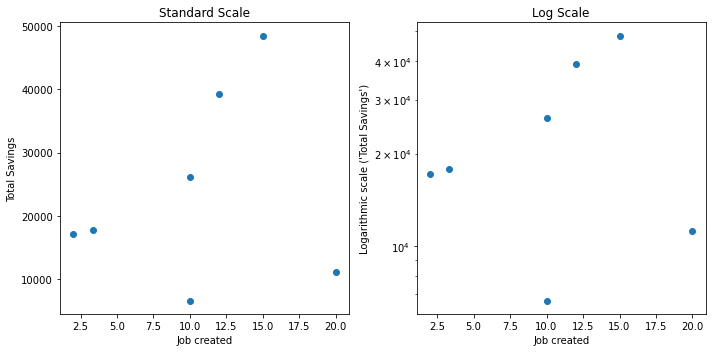

In [183]:
fig, ax = plt.subplots(1,2, figsize=(10,5))

ax[0].scatter(df_nta['Job created'], df_nta['Total Savings'])
ax[0].set_xlabel('Job created')
ax[0].set_ylabel('Total Savings')
ax[0].set_title('Standard Scale')


ax[1].scatter(df_nta['Job created'], df_nta['Total Savings'])
ax[1].set_xlabel('Job created')
ax[1].set_ylabel("Logarithmic scale ('Total Savings')")
ax[1].set_yscale('log')
ax[1].set_title('Log Scale')

fig.tight_layout()



<br>
2) histogram of the log of the average total savings.

Text(0.5, 1.0, 'Histogram')

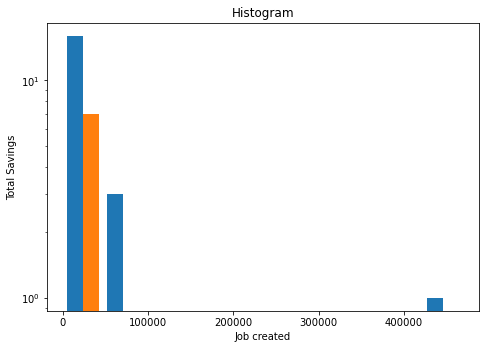

In [184]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.hist(df_nta)
ax.set_xlabel('Job created')
ax.set_ylabel('Total Savings')
ax.set_yscale('log')
ax.set_title('Histogram')


<br>
3) line plot of the total jobs created for each month.

Text(0.5, 1.0, 'Line Plot')

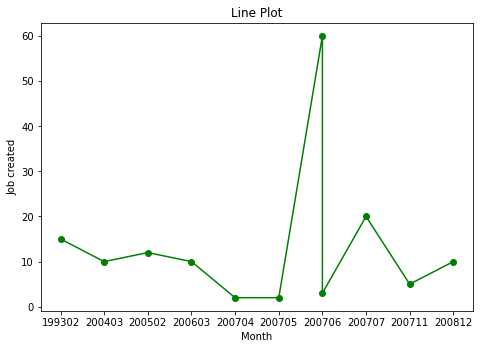

In [188]:
import datetime as dt

# df['Job created'].isnull().sum()
df['Eff_DT'] = pd.to_datetime(df['Effective Date'], format='%m/%d/%Y').dt.strftime('%Y%m')
# df['year'] =  df['Eff_DT'].dt.year
# df['month'] = df['Eff_DT'].dt.month

df_job = df.dropna(subset=['Job created'])
df_job = df_job.sort_values(by=['Eff_DT'],ascending=True)
# print(df_job['Job created'].min(),df_job['Job created'].max(), df_job['Eff_DT'].min(),df_job['Eff_DT'].max())


fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.plot(df_job['Eff_DT'], df_job['Job created'], color='green', marker='o')
ax.set_xlabel('Month')
ax.set_ylabel('Job created')
ax.set_title('Line Plot')

